In [1]:
import pandas as pd

In [2]:
complaints_df = pd.read_csv("../data/complaints.csv")
complaints_df

,Consumer complaint narrative,Issue
0,My name is XXXX XXXX this complaint is not mad...,Incorrect information on your report
1,I searched on XXXX for XXXXXXXX XXXX and was ...,Fraud or scam
2,I have a particular account that is stating th...,Incorrect information on your report
3,I have not supplied proof under the doctrine o...,Attempts to collect debt not owed
4,Hello i'm writing regarding account on my cred...,Incorrect information on your report
...,...,...
353427,Collections account I have no knowledge of,Attempts to collect debt not owed
353428,"Dear CFPB Team, The reason for my complaint is...",Attempts to collect debt not owed
353429,FRCA violations : Failing to Follow Debt Dispu...,Attempts to collect debt not owed
353430,"My Father, a XXXX XXXX acquired an HECM rever...",Struggling to pay mortgage


In [3]:
issue_counts = complaints_df["Issue"].value_counts()
print(issue_counts)

Incorrect information on your report    229305
Attempts to collect debt not owed        73163
Communication tactics                    21243
Struggling to pay mortgage               17374
Fraud or scam                            12347
Name: Issue, dtype: int64


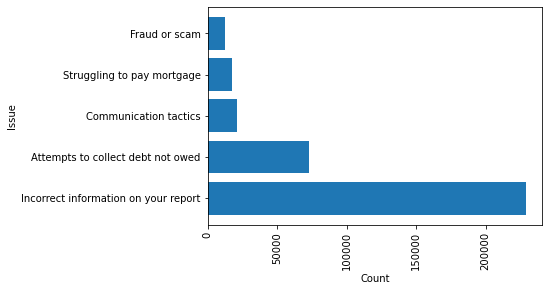

In [4]:
import matplotlib.pyplot as plt

plt.barh(issue_counts.index, issue_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Count")
plt.ylabel("Issue")
plt.show()

In [5]:
avg_length = complaints_df['Consumer complaint narrative'].str.len().mean()
print(avg_length)

1029.6670080807623


In [6]:
avg_length_by_classification = complaints_df.groupby('Issue')['Consumer complaint narrative'].apply(lambda x: x.str.len().mean())
print("The average length of complaint grouped by classification is:\n", avg_length_by_classification)

The average length of complaint grouped by classification is:
 Issue
Attempts to collect debt not owed       1000.366401
Communication tactics                    751.250294
Fraud or scam                           1360.773953
Incorrect information on your report     982.515222
Struggling to pay mortgage              1880.483711
Name: Consumer complaint narrative, dtype: float64


In [7]:
word_count = complaints_df['Consumer complaint narrative'].str.split().apply(len).sum()
char_count = complaints_df['Consumer complaint narrative'].str.len().sum()
print("The total word count of complaints is:", word_count)
print("The total character count of complaints is:", char_count)

The total word count of complaints is: 64920688
The total character count of complaints is: 363917270


In [9]:
import nltk
import pandas as pd
import re

# Get the list of stopwords
stopwords_list = nltk.corpus.stopwords.words('english')

# Create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Issue', 'Words', 'Frequency'])

# Loop over each issue
for issue in complaints_df['Issue'].unique():
    # Filter the data to include only the current issue
    issue_df = complaints_df[complaints_df['Issue'] == issue]
    
    # Remove stopwords and special characters from the text
    issue_df['Consumer complaint narrative'] = issue_df['Consumer complaint narrative'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))
    issue_df['Consumer complaint narrative'] = issue_df['Consumer complaint narrative'].apply(lambda x: ' '.join(word for word in x.split() if word not in stopwords_list and not word.startswith('x')))
    
    # Get the most common words
    words = nltk.FreqDist(issue_df['Consumer complaint narrative'].str.cat(sep=' ').split())
    top_words = pd.DataFrame(words.most_common(5), columns=['Words', 'Frequency'])
    top_words['Issue'] = issue
    results_df = results_df.append(top_words, ignore_index=True)
    
    # Get the most common bigrams
    bigrams = nltk.FreqDist(list(nltk.bigrams(issue_df['Consumer complaint narrative'].str.cat(sep=' ').split())))
    top_bigrams = pd.DataFrame(bigrams.most_common(5), columns=['Words', 'Frequency'])
    top_bigrams['Words'] = top_bigrams['Words'].apply(lambda x: ' '.join(word for word in x if word != 'xxxx'))
    top_bigrams['Words'] = top_bigrams['Words'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))
    top_bigrams['Issue'] = issue
    results_df = results_df.append(top_bigrams, ignore_index=True)
    
    # Get the most common trigrams
    trigrams = nltk.FreqDist(list(nltk.trigrams(issue_df['Consumer complaint narrative'].str.cat(sep=' ').split())))
    top_trigrams = pd.DataFrame(trigrams.most_common(5), columns=['Words', 'Frequency'])
    top_trigrams['Words'] = top_trigrams['Words'].apply(lambda x: ' '.join(word for word in x if word != 'xxxx'))
    top_trigrams['Words'] = top_trigrams['Words'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))
    top_trigrams['Issue'] = issue
    results_df = results_df.append(top_trigrams, ignore_index=True)

#Display results_df
pd.set_option("display.max_rows", None)
results_df

C:\Users\garre\AppData\Local\Temp\ipykernel_9812\4040917605.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  issue_df['Consumer complaint narrative'] = issue_df['Consumer complaint narrative'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))
C:\Users\garre\AppData\Local\Temp\ipykernel_9812\4040917605.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  issue_df['Consumer complaint narrative'] = issue_df['Consumer complaint narrative'].apply(lambda x: ' '.join(word for word in x.split() if word not in 

,Issue,Words,Frequency
0,Incorrect information on your report,credit,575450
1,Incorrect information on your report,account,347849
2,Incorrect information on your report,report,342674
3,Incorrect information on your report,information,292623
4,Incorrect information on your report,reporting,233174
5,Incorrect information on your report,credit report,166459
6,Incorrect information on your report,identity theft,88038
7,Incorrect information on your report,credit reporting,69092
8,Incorrect information on your report,credit bureaus,50073
9,Incorrect information on your report,15 usc,42936
